# Analyze annual CO2 emission by country level

#### This file would try to explore and analyze the annual CO2 emission by country level. Eventually, we want to build a relationship between CO2 emission amount and the worldwide awareness level. Several steps are taken in this section:
##1.adjust the existing visualization√
##2.add geospatical visualization for year 2008
##3.visualize/anaylsis the us emission by years trend √
##4.find the awareness data for most/least emission and compared√

In [2]:
conda install geopandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries that are needed
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

#### Read in the orginial data from Global Carbon Project (2017)

In [22]:
df_country_emission = pd.read_csv('Datasets/annual_co2_emissions_per_country.csv')

In [23]:
df_country_emission

,Entity,Code,Year,Annual CO₂ emissions (Global Carbon Project (2017)) (tonnes)
0,Afghanistan,AFG,1751,0.0
1,Afghanistan,AFG,1752,0.0
2,Afghanistan,AFG,1753,0.0
3,Afghanistan,AFG,1754,0.0
4,Afghanistan,AFG,1755,0.0
...,...,...,...,...
55985,Zimbabwe,ZWE,2012,7790000.0
55986,Zimbabwe,ZWE,2013,11670000.0
55987,Zimbabwe,ZWE,2014,12010000.0
55988,Zimbabwe,ZWE,2015,11730000.0


In [24]:
df_country_emission= df_country_emission.dropna()
df_country_emission = df_country_emission.rename(index=str, columns={"Annual CO₂ emissions (Global Carbon Project (2017)) (tonnes)": "Annual CO₂ emissions(tonnes)"})

In [25]:
df_country_emission= df_country_emission[df_country_emission['Annual CO₂ emissions(tonnes)'] != 0]
#df_country_emission.rename(index=str, columns = {'Entity':'Country','Code':'Code','Year':'Year','Annual CO₂ emissions(tonnes)':'Annual CO₂ emissions(tonnes)'})
df_country_emission.set_index('Entity', inplace=True)
df_country_emission

,Code,Year,Annual CO₂ emissions(tonnes)
Entity,,,
Afghanistan,AFG,1949,14680.0
Afghanistan,AFG,1950,84410.0
Afghanistan,AFG,1951,91750.0
Afghanistan,AFG,1952,91750.0
Afghanistan,AFG,1953,106430.0
...,...,...,...
Zimbabwe,ZWE,2012,7790000.0
Zimbabwe,ZWE,2013,11670000.0
Zimbabwe,ZWE,2014,12010000.0


In [26]:
df_country_emission = df_country_emission.drop(['World'])
lines = df_country_emission.plot.line(x='Year', y='Annual CO₂ emissions(tonnes)', lw = 4, figsize=(100,50))
plt.title('The global annual emission', size = 100)
#plt.text(x+1, y+1, 'Entity', fontsize = 20)

Text(0.5, 1.0, 'The global annual emission')

In [27]:
us_annuale = df_country_emission.loc[ 'United States' , : ]
us_annuale

,Code,Year,Annual CO₂ emissions(tonnes)
Entity,,,
United States,USA,1800,2.532300e+05
United States,USA,1801,2.679100e+05
United States,USA,1802,2.899300e+05
United States,USA,1803,2.972700e+05
United States,USA,1804,3.339700e+05
...,...,...,...
United States,USA,2012,5.362090e+09
United States,USA,2013,5.514020e+09
United States,USA,2014,5.565490e+09


In [28]:
lines = us_annuale.plot.line(x='Year', y='Annual CO₂ emissions(tonnes)', color='red', lw=8, figsize=(100,50))
plt.title('The annual emission of US', size = 100)

Text(0.5, 1.0, 'The annual emission of US')

#### From the exsiting dataframe, extract new dataframe that includes the CO2 emission of countries in 2008.

In [29]:
df_country_emission_2008 = df_country_emission[df_country_emission['Year'] == 2008]
df_country_emission_2008 = df_country_emission_2008.drop(columns = ['Code','Year'])
df_country_emission_2008

,Annual CO₂ emissions(tonnes)
Entity,
Afghanistan,4200000.0
Albania,4370000.0
Algeria,110120000.0
Andorra,540000.0
Angola,25690000.0
...,...
Vietnam,117900000.0
Wallis and Futuna,20000.0
Yemen,22320000.0


#### Anaylsis 2008 country CO2 emission
1. Find the most and the least amount of emission in country level
2. Consider the population of each country and calculate the CO2 emission by capital

In [30]:
sort_df_country_emission_2008 = df_country_emission_2008.sort_values(by = ['Annual CO₂ emissions(tonnes)'], ascending = False)
#sort_df_country_emission_2008 = sort_df_country_emission_2008.drop(['World'])
sort_df_country_emission_2008

,Annual CO₂ emissions(tonnes)
Entity,
China,7.546890e+09
United States,5.932980e+09
Russia,1.685270e+09
India,1.567100e+09
Japan,1.237290e+09
...,...
Nauru,4.000000e+04
Wallis and Futuna,2.000000e+04
Niue,1.000000e+04


In [31]:
!pip install descartes
!pip install PySAL
!pip install mapclassify

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [33]:
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})
countries.head()

,geometry,country
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina


In [34]:
from geopandas import GeoDataFrame

In [35]:
df_map = df_country_emission_2008.merge(countries, left_on='Entity', right_on='country')
df_geo = GeoDataFrame(df_map) 
print(df_geo)

     Annual CO₂ emissions(tonnes)  \
0                       4200000.0   
1                       4370000.0   
2                     110120000.0   
3                      25690000.0   
4                     188950000.0   
..                            ...   
151                   178970000.0   
152                   117900000.0   
153                    22320000.0   
154                     2170000.0   
155                     7760000.0   

                                              geometry      country  
0    POLYGON ((61.21081709172574 35.65007233330923,...  Afghanistan  
1    POLYGON ((20.59024743010491 41.85540416113361,...      Albania  
2    POLYGON ((11.99950564947161 23.47166840259645,...      Algeria  
3    (POLYGON ((16.32652835456705 -5.87747039146621...       Angola  
4    (POLYGON ((-65.50000000000003 -55.199999999999...    Argentina  
..                                                 ...          ...  
151  POLYGON ((-71.3315836249503 11.77628408451581,...    Venezue

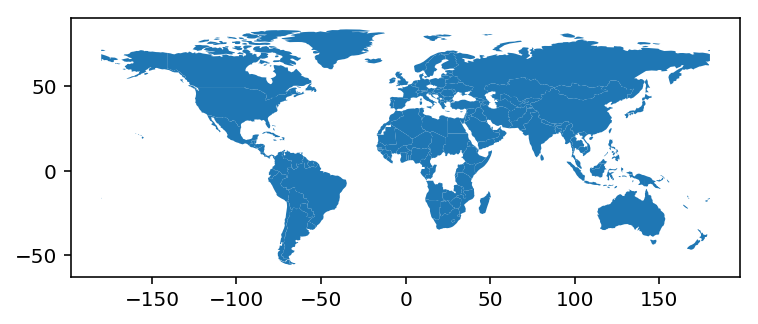

In [36]:
df_geo.plot()

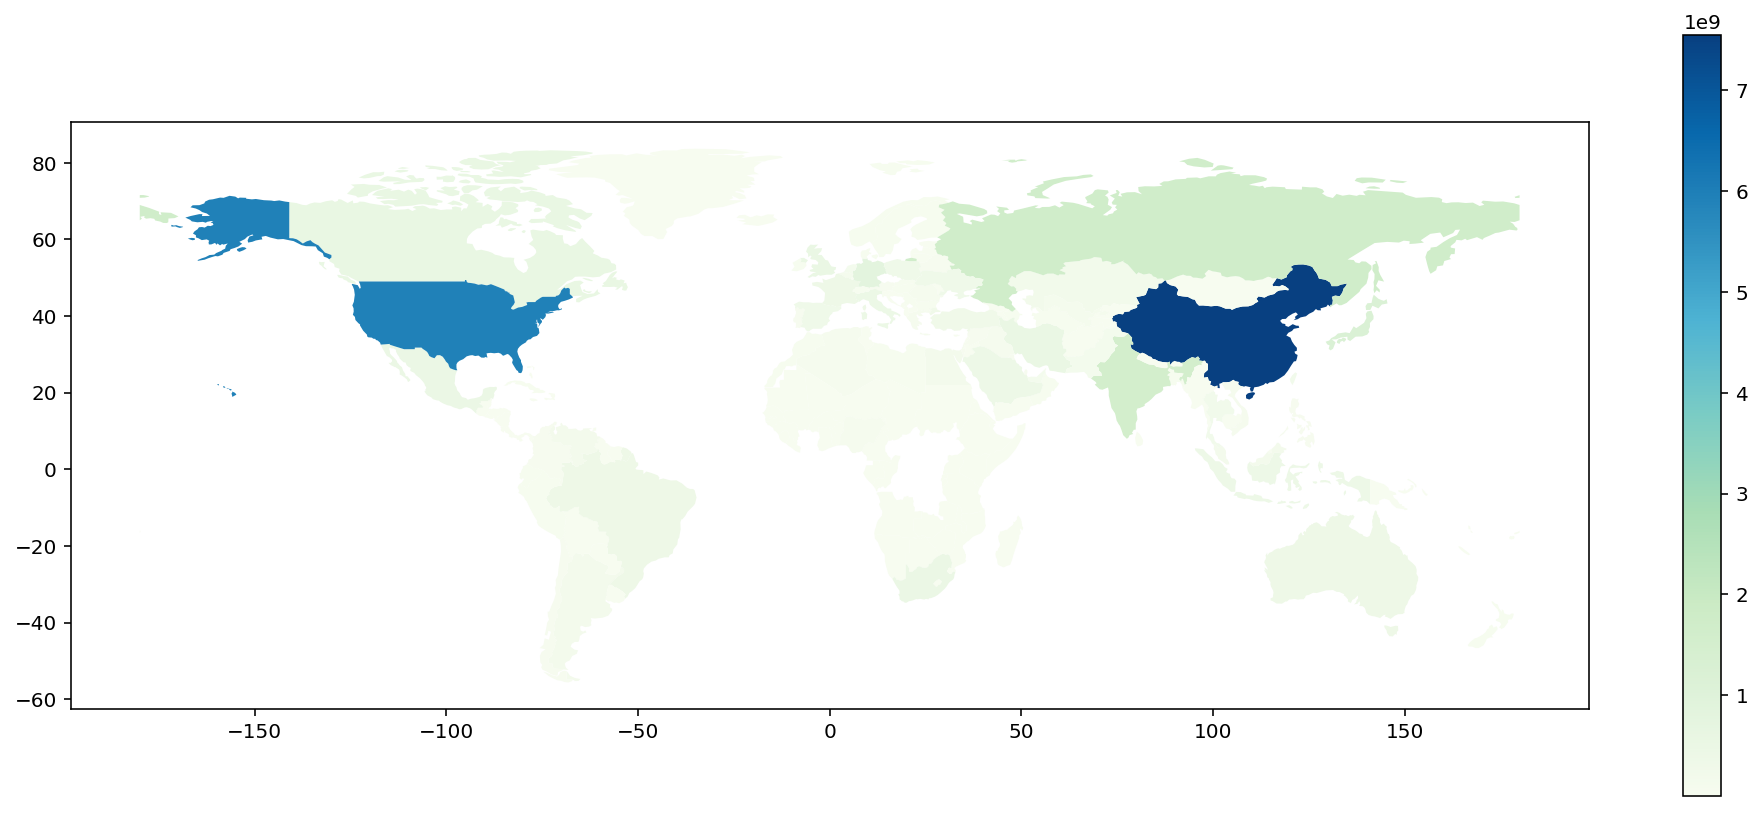

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
df_geo.plot(column='Annual CO₂ emissions(tonnes)', ax=ax, cmap='GnBu', legend=True);

In [38]:
sort_df_country_emission_2008 = df_country_emission_2008.sort_values(by = ['Annual CO₂ emissions(tonnes)'], ascending = False)
#sort_df_country_emission_2008 = sort_df_country_emission_2008.drop(['World'])
ax = sort_df_country_emission_2008.plot.bar(rot=0, figsize=(100,50))
plt.title('Global CO2 Emmission Level in 2008', size = 100)
plt.xlabel('Countries', size = 80)
plt.ylabel('The Amount of Emission', size = 80)

Text(0, 0.5, 'The Amount of Emission')

#### with the graph above we see china and us has extremely high emission relatively to other countries.

In [39]:
country_most_df_2008 = sort_df_country_emission_2008.head(10)
country_most_df_2008

,Annual CO₂ emissions(tonnes)
Entity,
China,7.546890e+09
United States,5.932980e+09
Russia,1.685270e+09
India,1.567100e+09
Japan,1.237290e+09
Germany,8.535900e+08
Canada,5.721600e+08
Iran,5.411400e+08
United Kingdom,5.398400e+08


Text(0.5, 0, 'Countries')

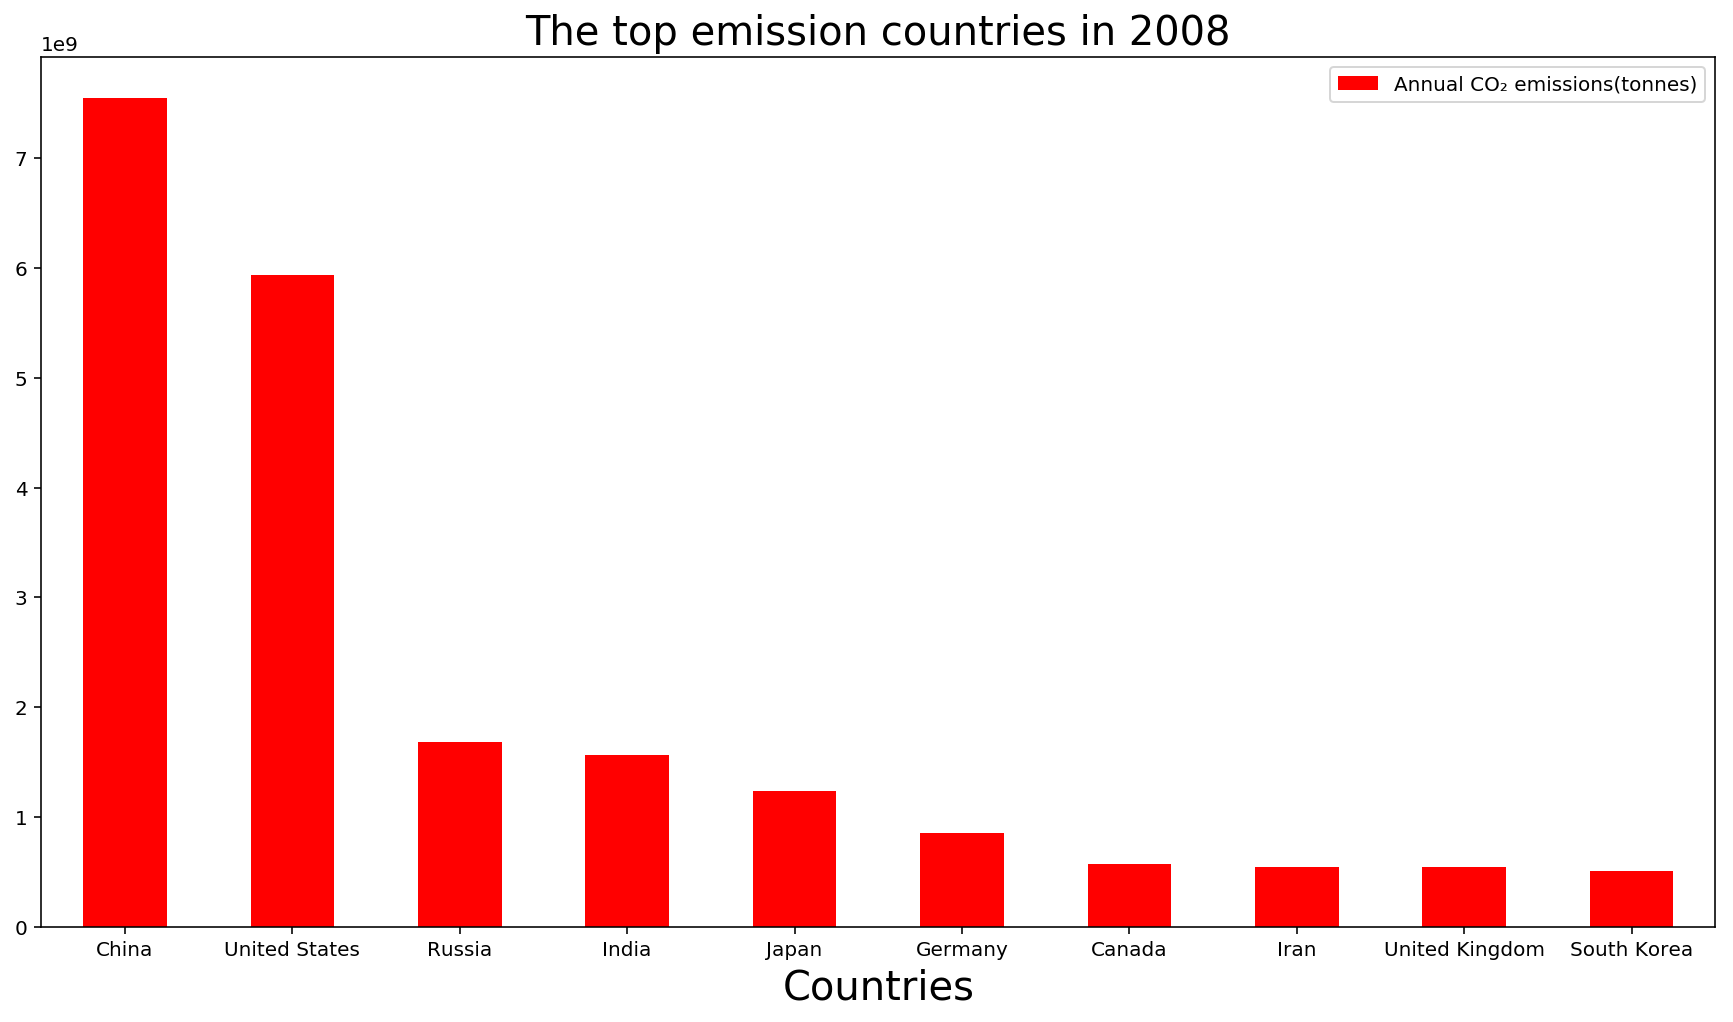

In [40]:
bx = country_most_df_2008.plot.bar(rot=0, figsize = (15,8), color = 'red')
plt.title('The top emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [41]:
country_least_df_2008 = sort_df_country_emission_2008.tail(10)
country_least_df_2008

,Annual CO₂ emissions(tonnes)
Entity,
Saint Pierre and Miquelon,70000.0
Cook Islands,70000.0
Falkland Islands,60000.0
Montserrat,50000.0
Kiribati,50000.0
Nauru,40000.0
Wallis and Futuna,20000.0
Niue,10000.0
Tuvalu,10000.0


Text(0.5, 0, 'Countries')

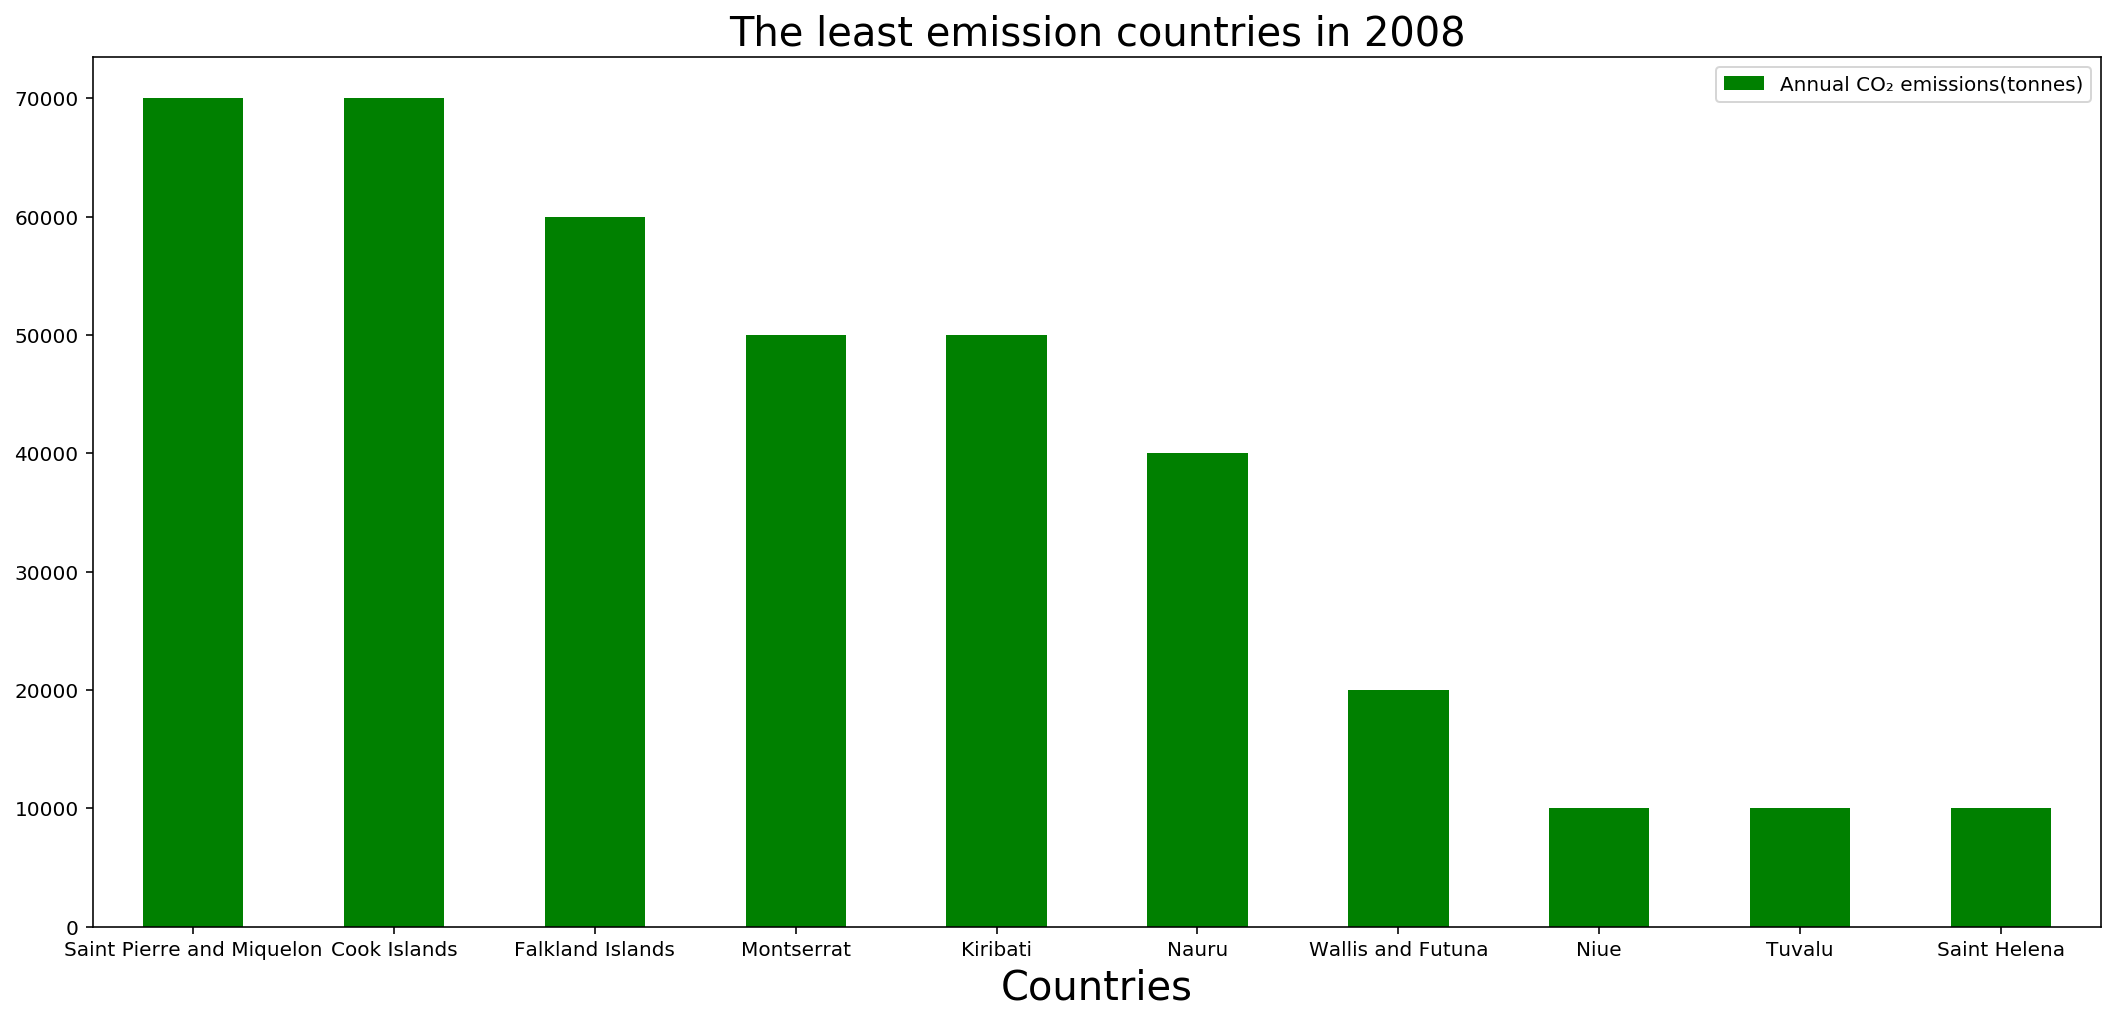

In [42]:
cx = country_least_df_2008.plot.bar(rot=0, figsize=(18,8), color = 'green')
plt.title('The least emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

However, the 10 most and least CO2 emission by country level is not a fair rank and could not precisely quantify a countries responsibility for the climate change worldwide. 
By these statistics, it is clear that the top-ranked countries, like China, must contribute more on global warming than low-ranked countries, like Tuvalu, did in year 2008. But the population, the level of industrialization, and other confounds is worthy considering.

Thus, we read another data set which includes population and other confounds to analysis a country's CO2 emission level. Meanly, we compare different countries emission level by emission amount in a year per capita.

In [4]:
df_country = pd.read_excel('Datasets/awareness_by_percentage.xlsx', header=1)
df_country

,WP5,Country,ISO,Region,Sub_region,Sample.2007,Sample.2008,Sample.Total,Population.2008,WPCIAS,...,Ratio_aware,Serious,Not_serious,RF_serious,AUC_serious,CITree_serious,Top1_serious,Top2_serious,Top3_serious,Ratio_serious
0,70,Afghanistan,AFG,Asia,Western Asia,0,1010,1010,1.374134e+07,6.43203,...,5.128087,73.758541,26.241459,76.838235,0.911369,76.84,Education,Cause_Global_Warming,Civic_Engagement,1.111990
1,56,Angola,AGO,Africa,Central Africa,0,1000,1000,9.547243e+06,0.56262,...,1.741134,91.369828,8.630172,91.441441,0.964999,91.44,Local_temp_perception,Cause_Global_Warming,Water_quality,1.087682
2,87,Argentina,ARG,Latin America & Caribbean,Southern South America,1000,1000,2000,2.959425e+07,9.07022,...,1.581608,94.361150,5.638850,94.885246,0.959696,94.89,Cause_Global_Warming,EnvBehavior,Water_quality,9.268735
3,88,Armenia,ARM,Europe,Eastern Europe,1000,1000,2000,2.357567e+06,0.00485,...,1.565761,85.270095,14.729905,85.575049,0.923899,85.58,Urban_Rural,Local_temp_perception,EnvBehavior,1.989427
4,47,Australia,AUS,Europe (Oceania),Western Europe (AustraliaNZ),0,1005,1005,1.728642e+07,6.97902,...,1.012210,78.247424,21.752576,84.237462,0.904631,81.88,Cause_Global_Warming,Gov_effort_env_preservation,EnvBehavior,2.734019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,32,Venezuela,VEN,Latin America & Caribbean,Northern South America,0,1000,1000,1.964048e+07,0.77213,...,1.765261,98.127856,1.872144,98.086124,0.996612,98.09,Cause_Global_Warming,Civic_Engagement,NIL,1.420664
115,50,Vietnam,VNM,Asia,Southeast Asia,1018,1016,2034,6.412354e+07,638.26715,...,1.263532,74.101870,25.898130,77.291667,0.911802,74.86,Local_temp_perception,Civic_Engagement,Religion,2.290308
116,45,South Africa,ZAF,Africa,Southern Africa,1000,1000,2000,3.413674e+07,5.85663,...,1.061832,70.155082,29.844918,72.273325,0.900007,69.91,EnvBehavior,Cause_Global_Warming,Financial_Wellbeing,1.510701
117,67,Zambia,ZMB,Africa,Central Africa,0,1000,1000,6.607533e+06,6.42052,...,2.493193,69.199209,30.800791,79.040404,0.898965,71.46,Cause_Global_Warming,Religion,Water_quality,5.881887


In [5]:
df_country_population = df_country.filter(items=['Country', 'Population.2008'])
df_country_population = df_country_population.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_population.set_index('Entity', inplace=True)
df_country_population

,Population.2008
Entity,
Afghanistan,1.374134e+07
Angola,9.547243e+06
Argentina,2.959425e+07
Armenia,2.357567e+06
Australia,1.728642e+07
...,...
Venezuela,1.964048e+07
Vietnam,6.412354e+07
South Africa,3.413674e+07


In [6]:

sort_df_country_emission_2008 = sort_df_country_emission_2008.merge(df_country_population, on = 'Entity', validate = 'one_to_one')

NameError: name 'sort_df_country_emission_2008' is not defined

In [46]:
sort_df_country_emission_2008['Emission/capita'] = sort_df_country_emission_2008['Annual CO₂ emissions(tonnes)'].div(sort_df_country_emission_2008['Population.2008'].values,axis=0)

sort_df_country_emission_2008

,Annual CO₂ emissions(tonnes),Population.2008,Emission/capita
Entity,,,
China,7.546890e+09,1.076805e+09,7.008594
United States,5.932980e+09,2.430274e+08,24.412801
Russia,1.685270e+09,1.210846e+08,13.918116
India,1.567100e+09,8.108412e+08,1.932684
Japan,1.237290e+09,1.104990e+08,11.197295
...,...,...,...
Rwanda,5.400000e+05,5.651066e+06,0.095557
Chad,5.100000e+05,5.617401e+06,0.090789
Djibouti,5.000000e+05,5.258570e+05,0.950829


In [47]:
df_country_aware = df_country.filter(items=['Country', 'Aware'])
df_country_aware = df_country_aware.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_aware.set_index('Entity', inplace=True)
df_country_aware

,Aware
Entity,
Afghanistan,25.445975
Angola,42.877795
Argentina,76.460368
Armenia,78.151156
Australia,97.324499
...,...
Venezuela,63.858354
Vietnam,73.538025
South Africa,31.414458


In [48]:
country_emission_awareness_2008 = sort_df_country_emission_2008.merge(df_country_aware, on = 'Entity', validate = 'one_to_one')
country_emission_awareness_2008

,Annual CO₂ emissions(tonnes),Population.2008,Emission/capita,Aware
Entity,,,,
China,7.546890e+09,1.076805e+09,7.008594,61.881645
United States,5.932980e+09,2.430274e+08,24.412801,97.743534
Russia,1.685270e+09,1.210846e+08,13.918116,84.861034
India,1.567100e+09,8.108412e+08,1.932684,35.481885
Japan,1.237290e+09,1.104990e+08,11.197295,98.918356
...,...,...,...,...
Rwanda,5.400000e+05,5.651066e+06,0.095557,30.239067
Chad,5.100000e+05,5.617401e+06,0.090789,45.026337
Djibouti,5.000000e+05,5.258570e+05,0.950829,43.065372


In [49]:
sort_country_emission_awareness_2008 = country_emission_awareness_2008.sort_values(by = ['Emission/capita'], ascending = False)
sort_country_emission_awareness_2008 = sort_country_emission_awareness_2008.drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])
sort_country_emission_awareness_2008

,Emission/capita,Aware
Entity,,
Qatar,56.800698,64.687182
Luxembourg,27.852109,95.045039
United States,24.412801,97.743534
Saudi Arabia,23.986700,48.765197
Australia,23.422434,97.324499
...,...,...
Madagascar,0.169477,49.075389
Mali,0.152342,52.543511
Rwanda,0.095557,30.239067


In [50]:
df_most_cemission = sort_country_emission_awareness_2008['Emission/capita'].head(10)
df_most_cemission

Entity
Qatar            56.800698
Luxembourg       27.852109
United States    24.412801
Saudi Arabia     23.986700
Australia        23.422434
Canada           20.648233
Kazakhstan       18.099565
Estonia          15.704838
South Africa     14.540640
Iceland          14.450872
Name: Emission/capita, dtype: float64

Text(0.5, 0, 'Countries')

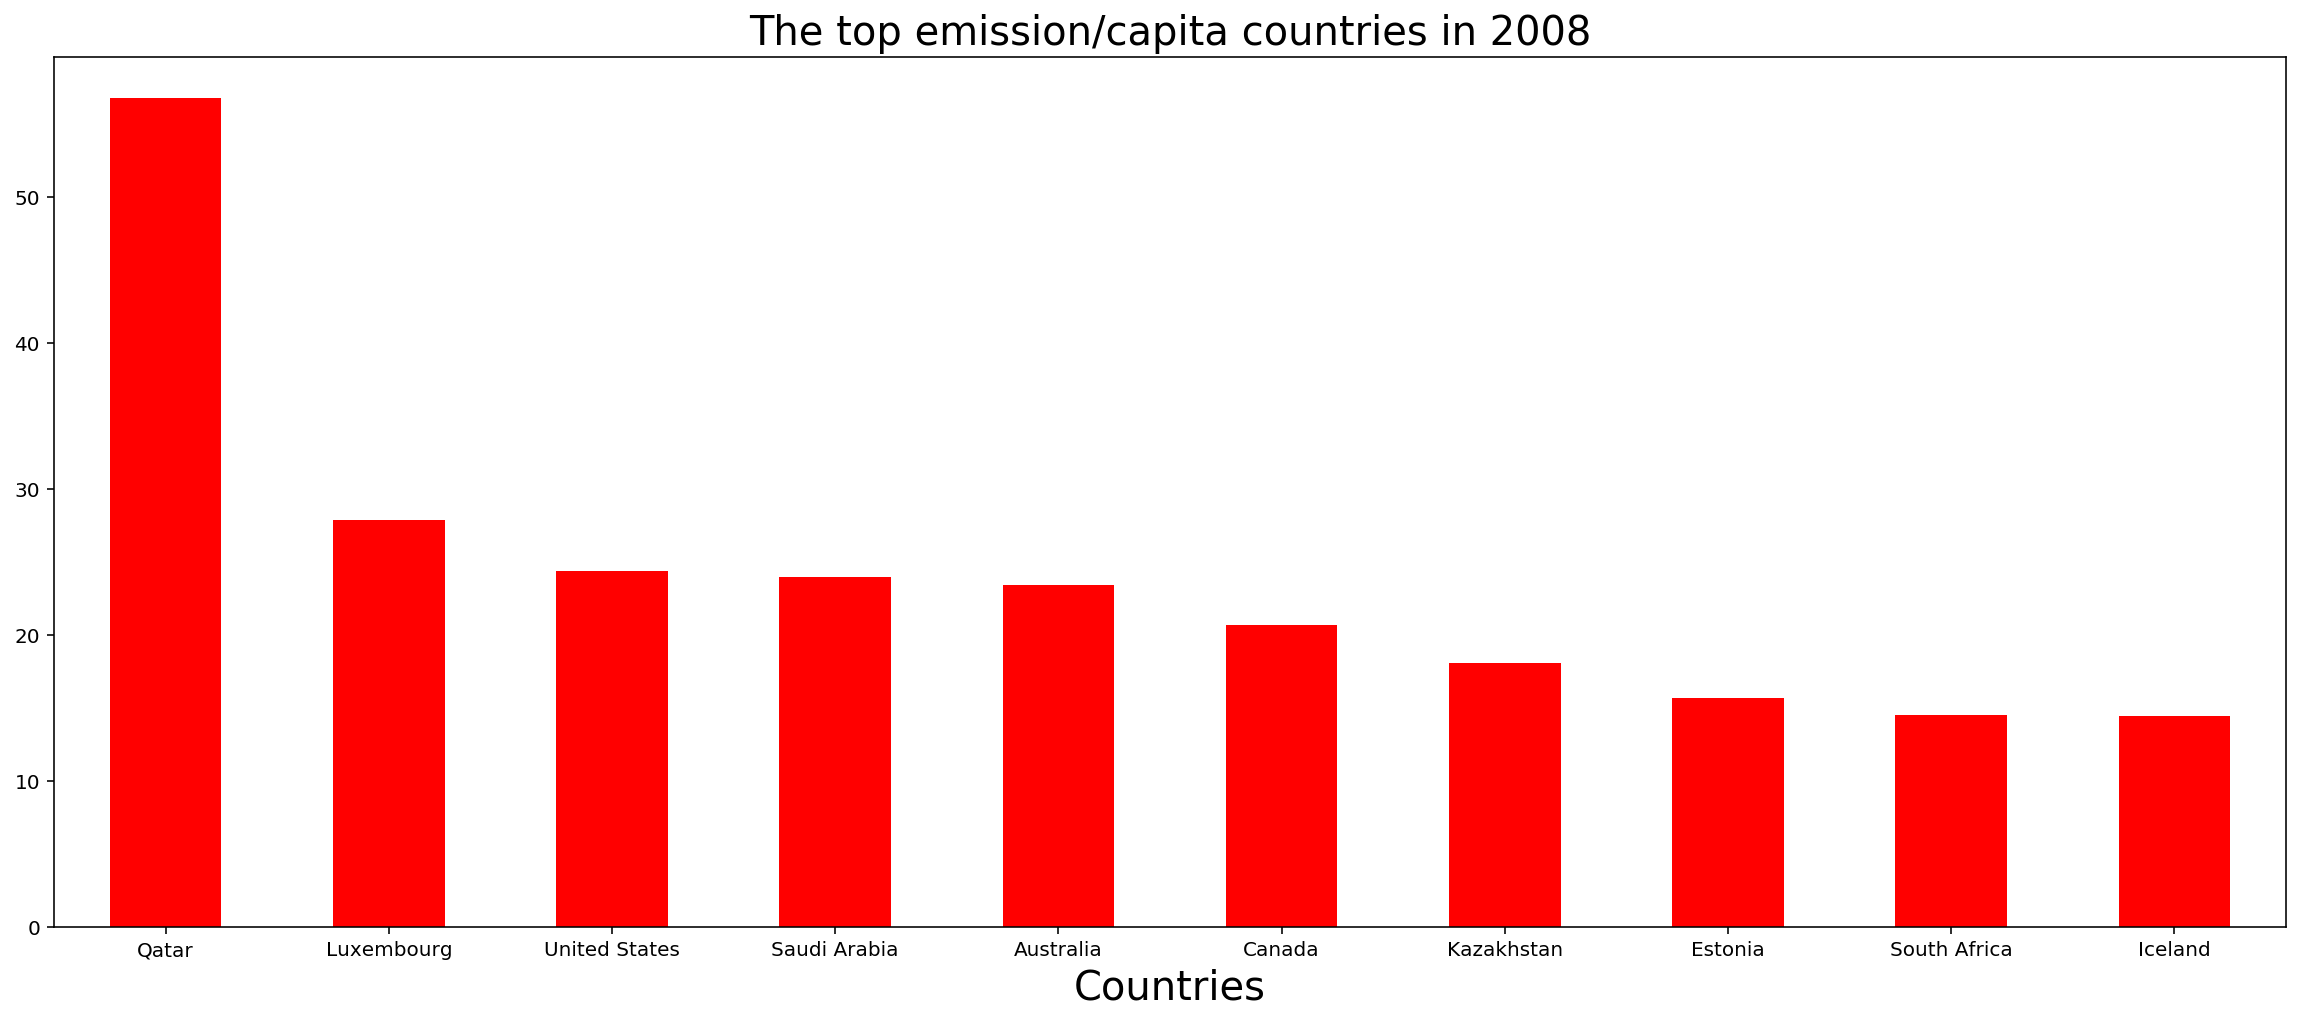

In [51]:
dx = df_most_cemission.plot.bar(rot=0, figsize=(20,8), color = 'red')
plt.title('The top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [52]:
df_most_cemission_awareness = sort_country_emission_awareness_2008['Aware'].head(10)
df_most_cemission_awareness

Entity
Qatar            64.687182
Luxembourg       95.045039
United States    97.743534
Saudi Arabia     48.765197
Australia        97.324499
Canada           95.383371
Kazakhstan       60.271706
Estonia          88.469069
South Africa     31.414458
Iceland          94.660749
Name: Aware, dtype: float64

Text(0.5, 0, 'Countries')

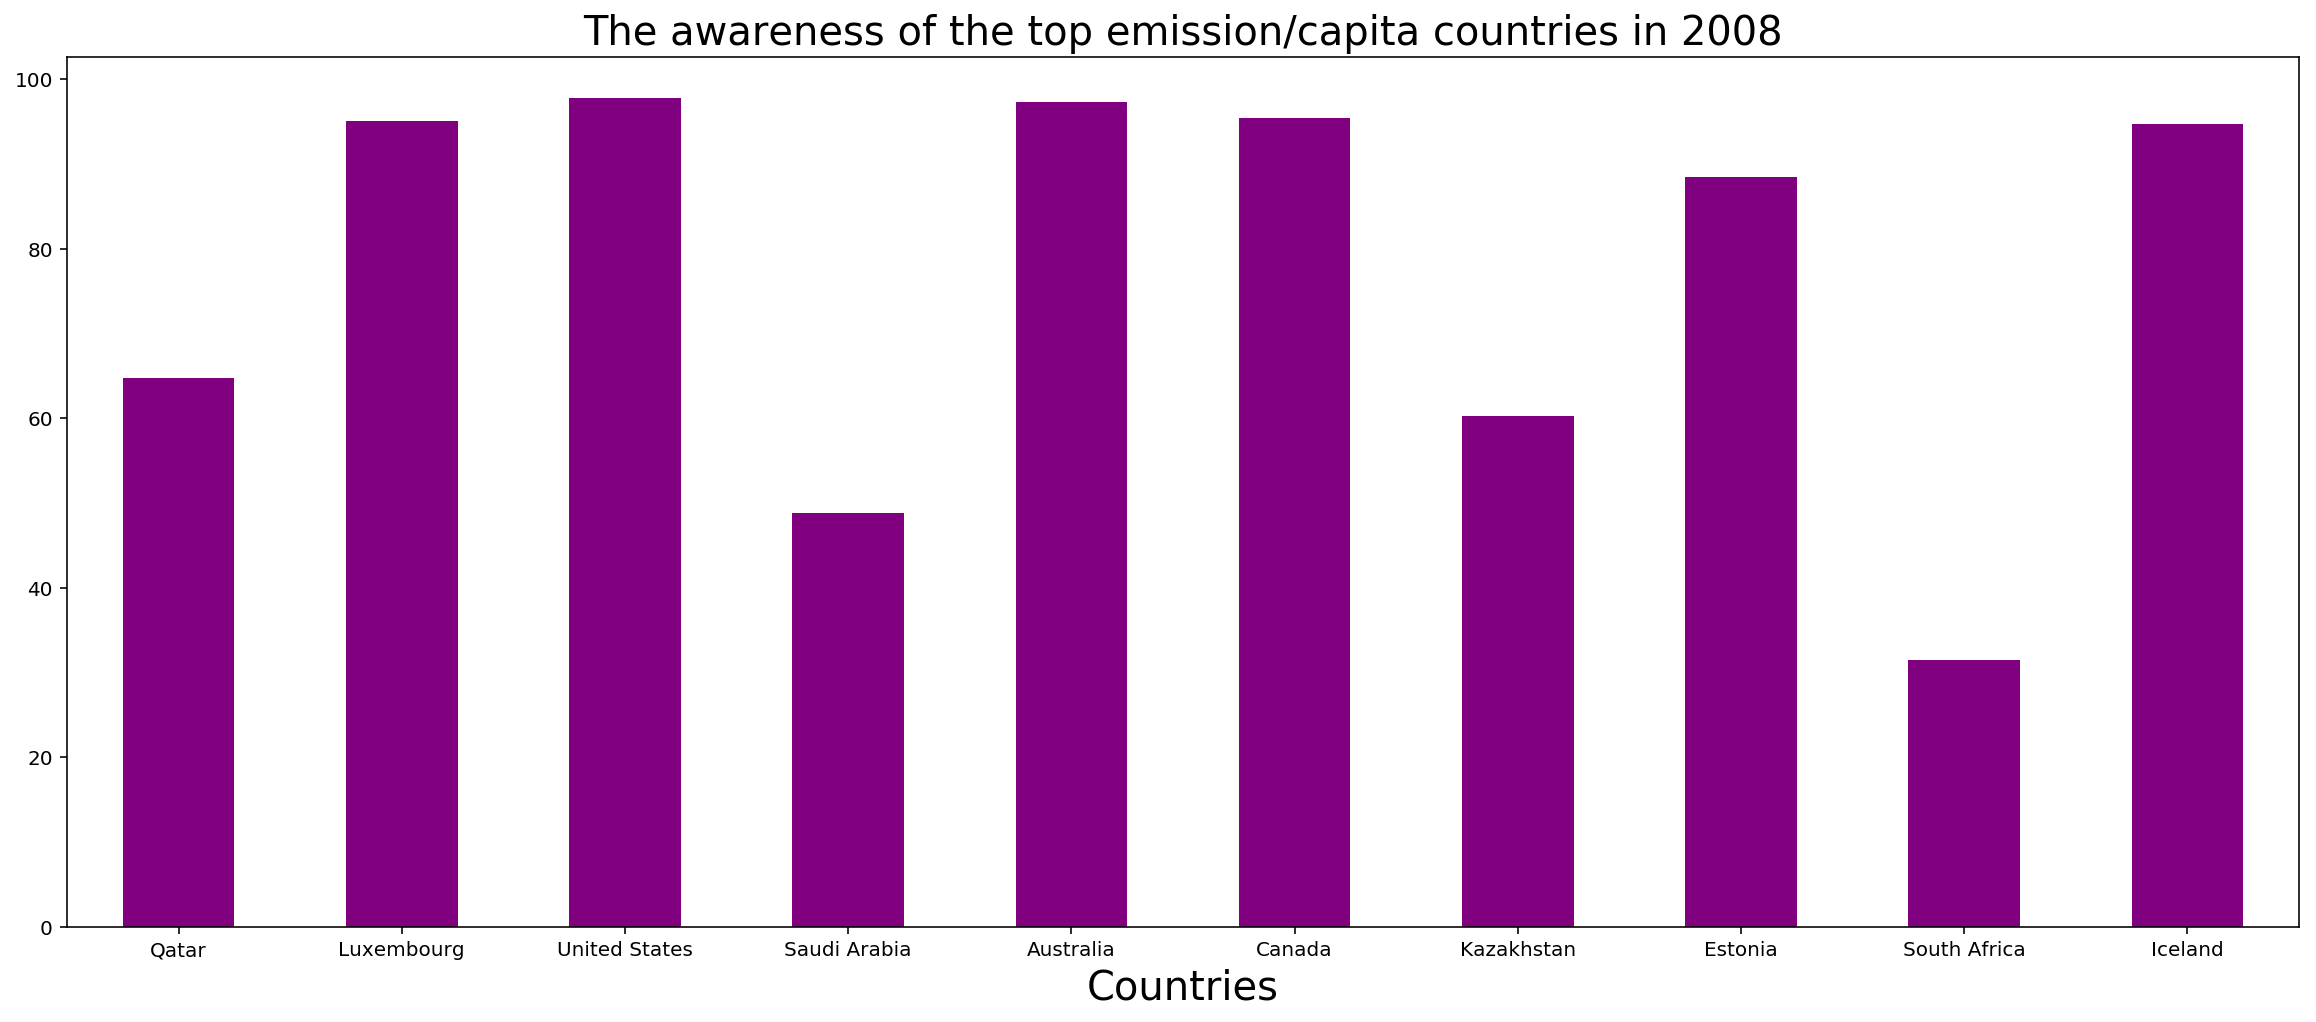

In [53]:
ex = df_most_cemission_awareness.plot.bar(rot=0, figsize=(20,8), color = 'purple')
plt.title('The awareness of the top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [54]:
most_emission_awareness = sort_country_emission_awareness_2008.head(10)
most_emission_awareness = most_emission_awareness.reset_index()
most_emission_awareness

,Entity,Emission/capita,Aware
0,Qatar,56.800698,64.687182
1,Luxembourg,27.852109,95.045039
2,United States,24.412801,97.743534
3,Saudi Arabia,23.986700,48.765197
4,Australia,23.422434,97.324499
5,Canada,20.648233,95.383371
6,Kazakhstan,18.099565,60.271706
7,Estonia,15.704838,88.469069
8,South Africa,14.540640,31.414458
9,Iceland,14.450872,94.660749


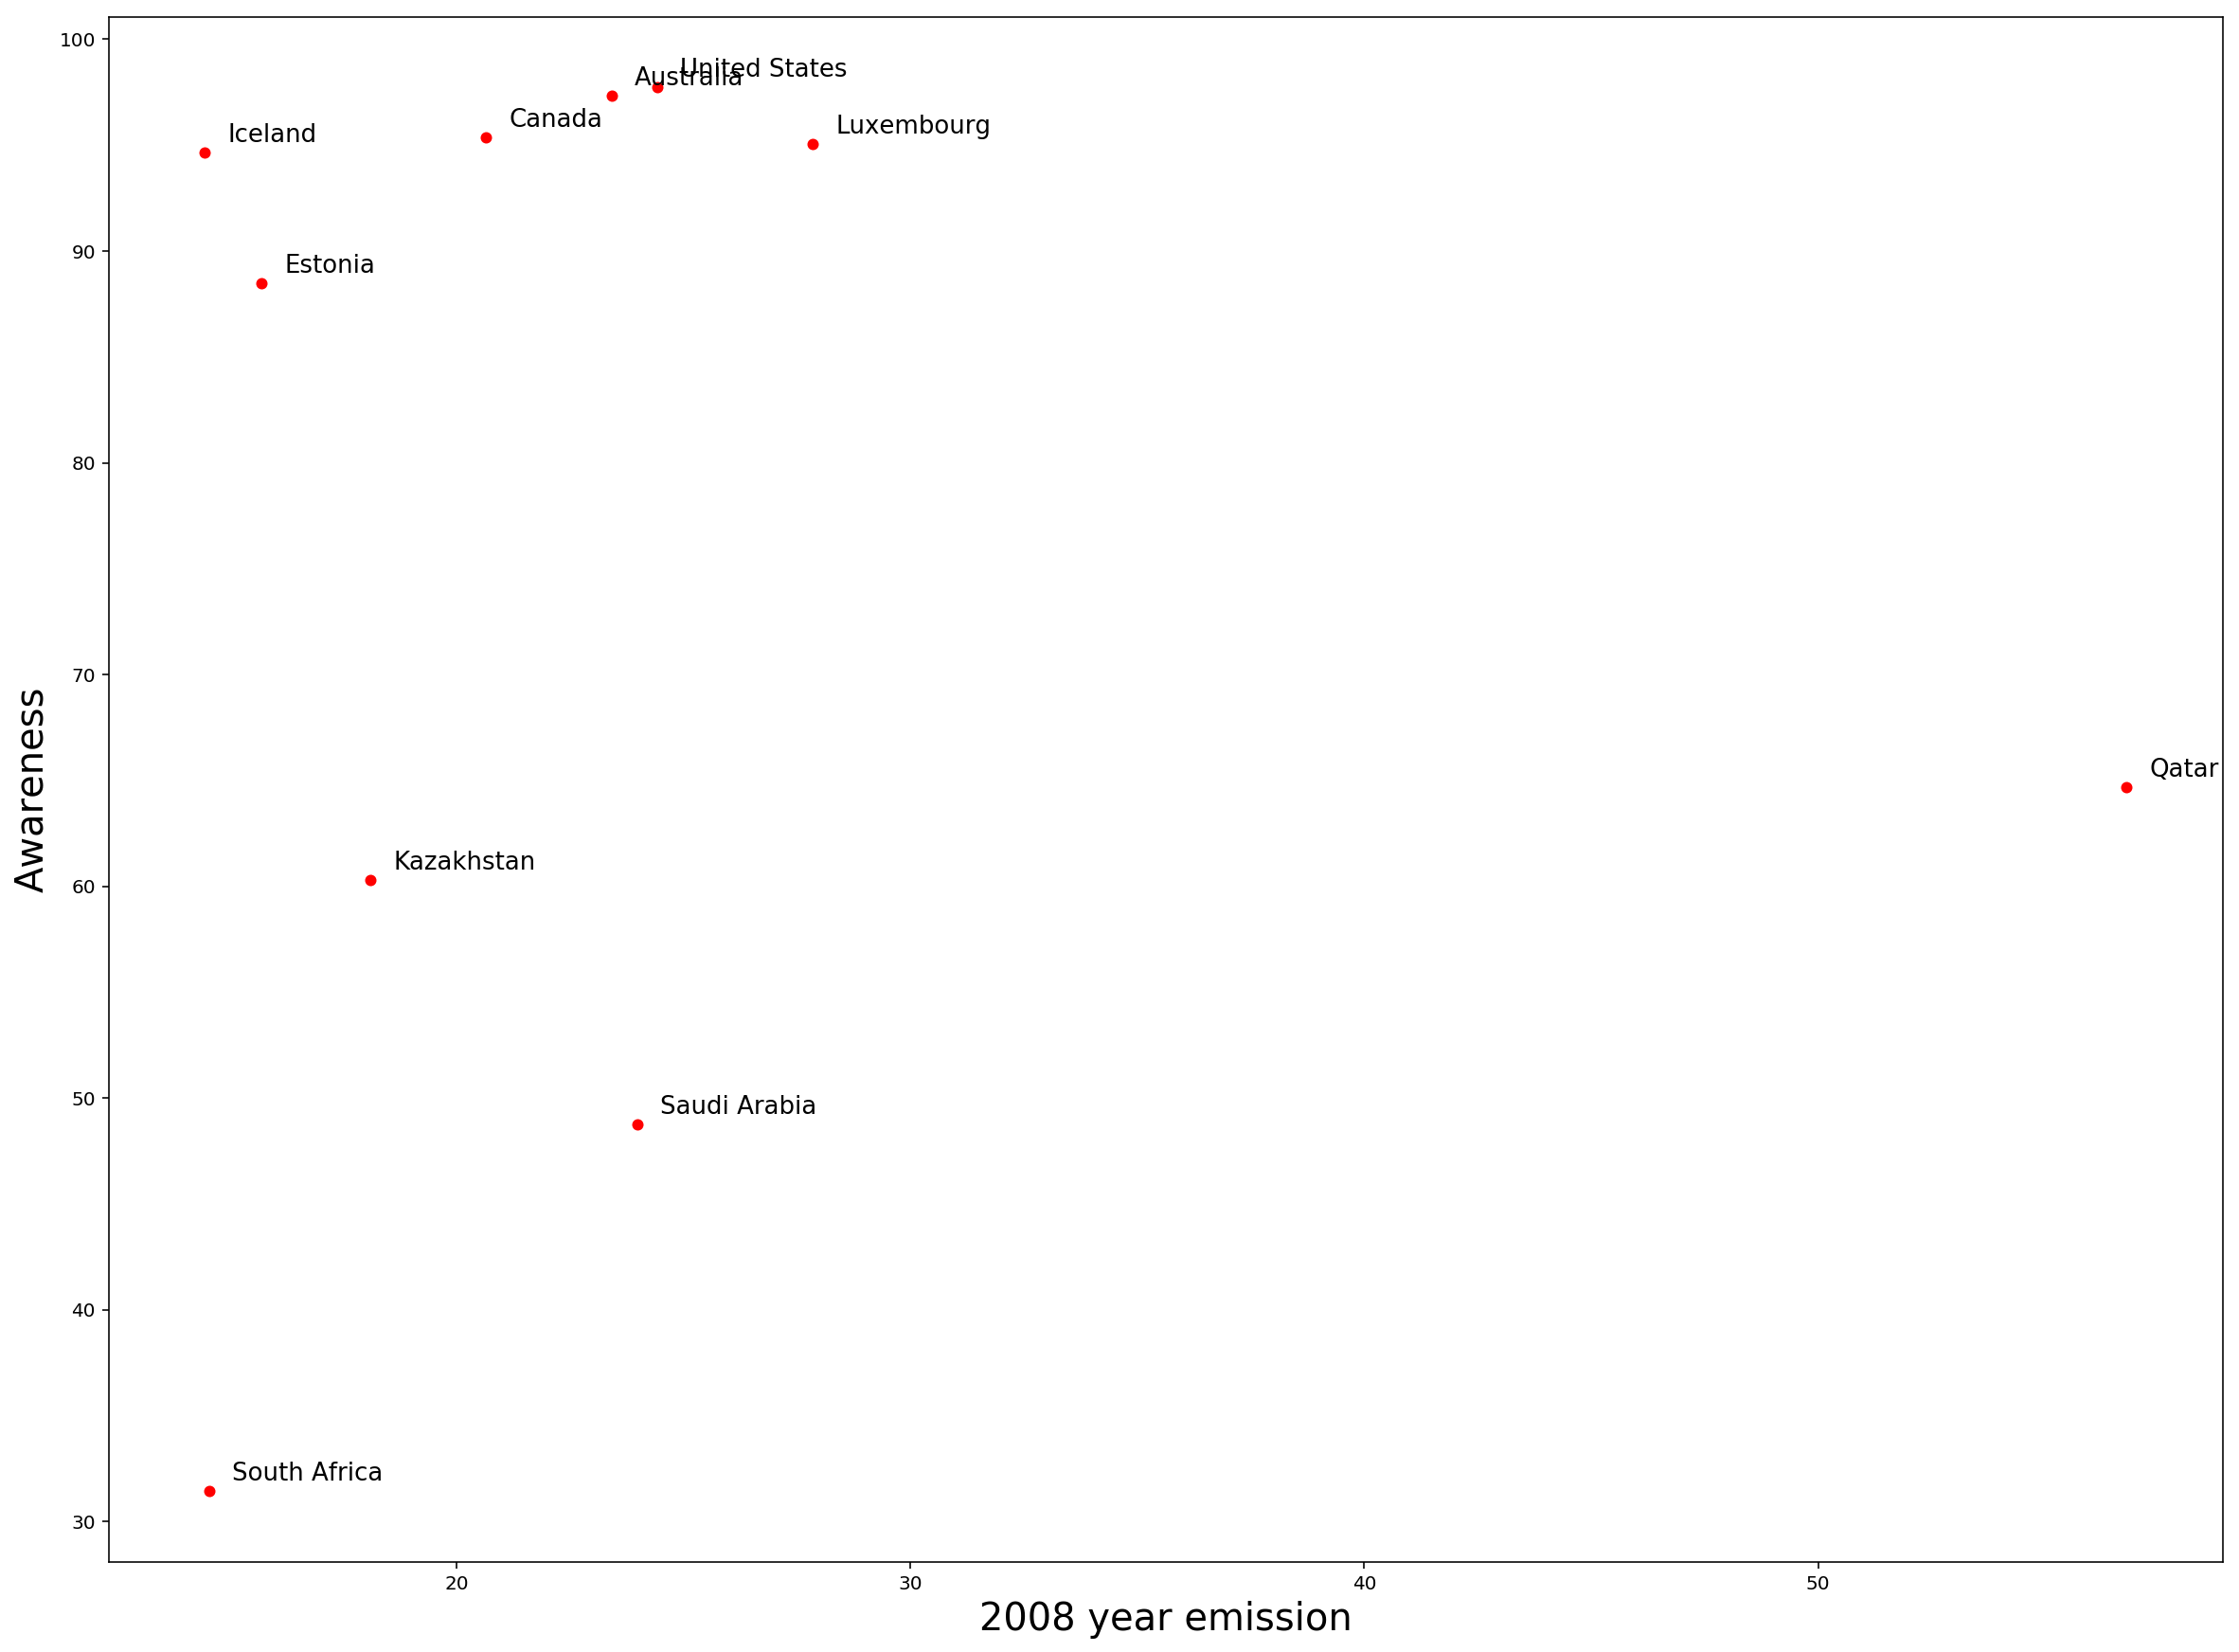

In [71]:
x = most_emission_awareness['Emission/capita']
y = most_emission_awareness['Aware']
types = most_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 10)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 13)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)
    
plt.gcf().set_size_inches((20, 15))
plt.show()

In [56]:
least_emission_awareness = country_emission_awareness_2008.tail(10).drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])
least_emission_awareness = least_emission_awareness.sort_values(by = ['Emission/capita'], ascending = True)
least_emission_awareness

,Emission/capita,Aware
Entity,,
Burundi,0.039451,21.722146
Chad,0.090789,45.026337
Rwanda,0.095557,30.239067
Mali,0.152342,52.543511
Sierra Leone,0.207257,35.913370
Laos,0.250107,80.076622
Liberia,0.269564,20.623373
Djibouti,0.950829,43.065372
Belize,2.359313,53.990749


In [57]:
df_least_cemission = least_emission_awareness['Emission/capita'].tail(10)
#df_least_cemission = sort_values(by = ['Emission/capita'], ascending = False)

Text(0.5, 0, 'Countries')

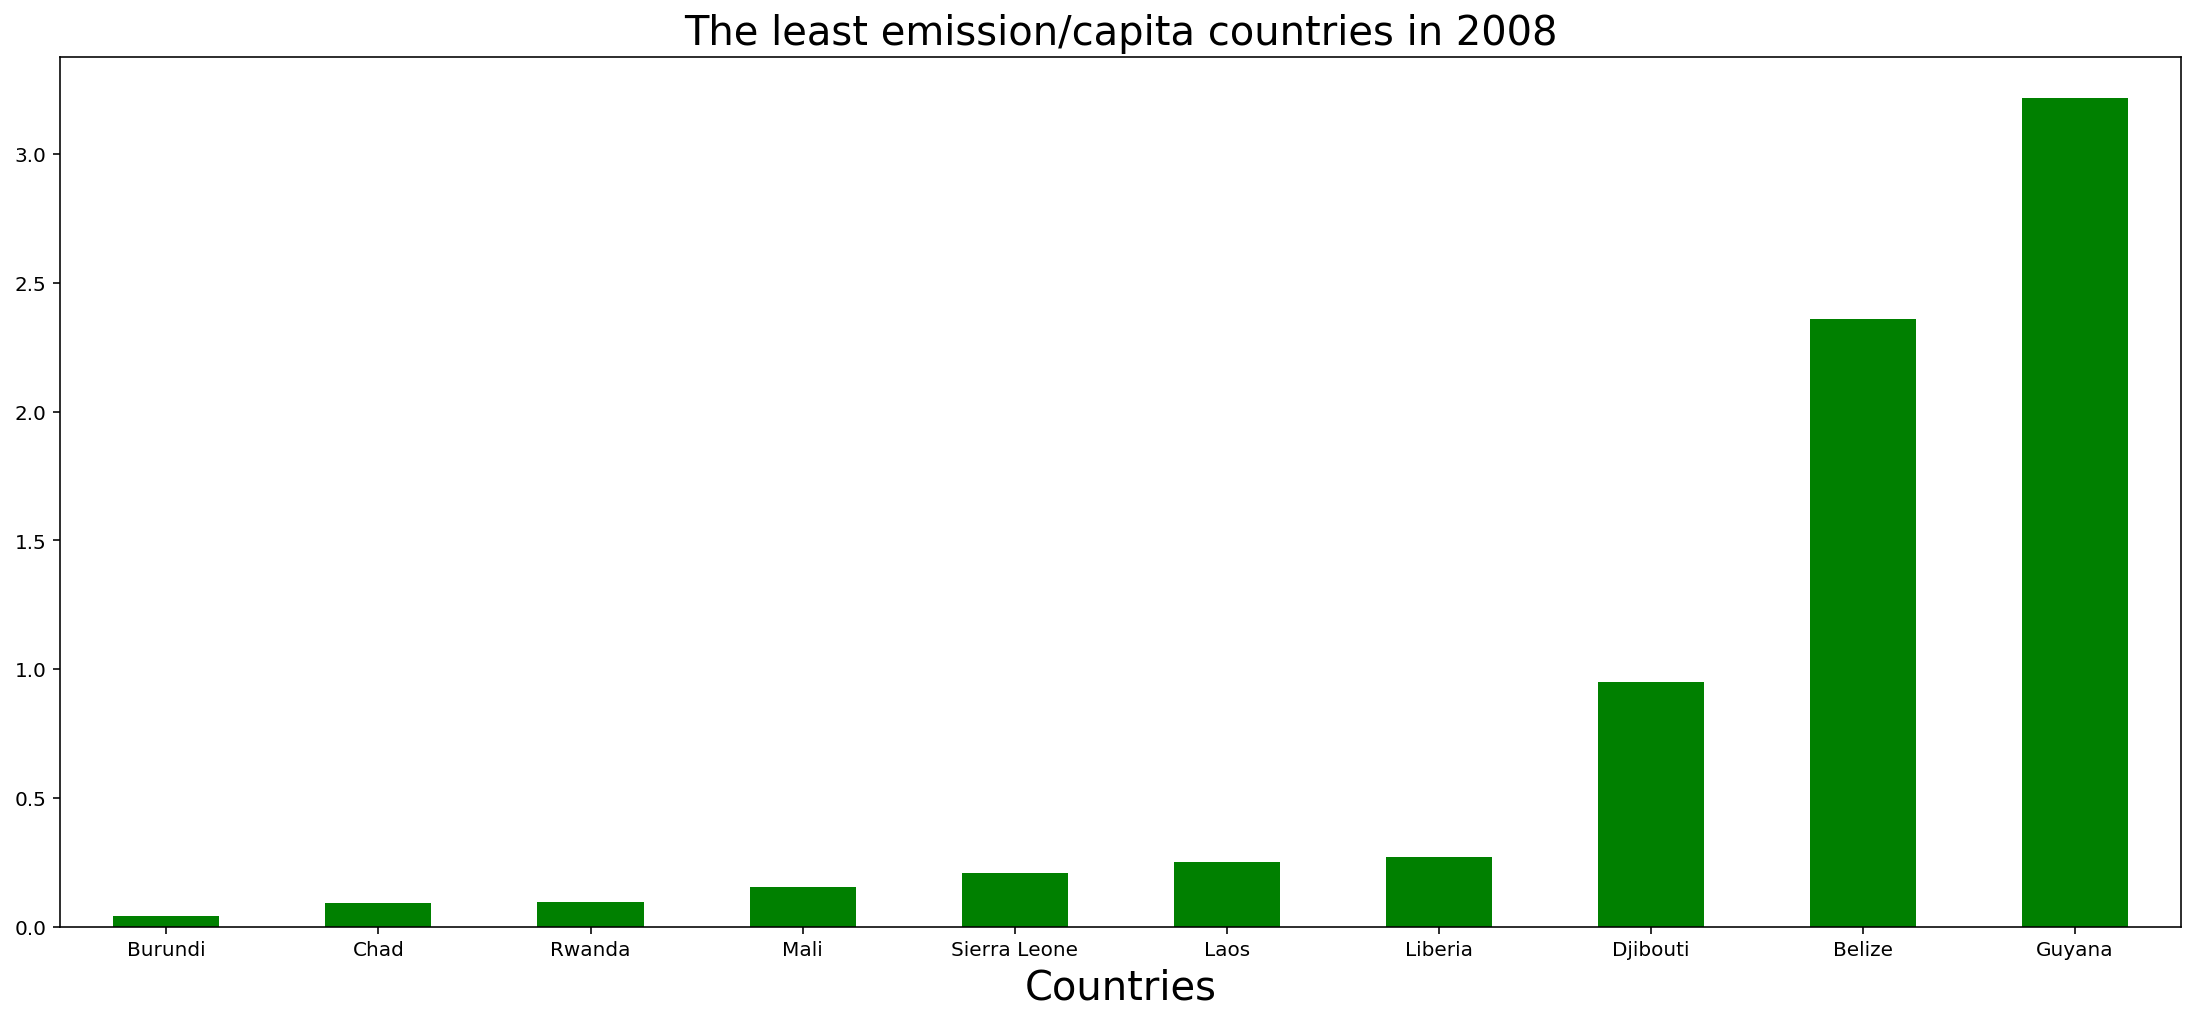

In [58]:
ex = df_least_cemission.plot.bar(rot=0, figsize = (19,8), color = 'green')
plt.title('The least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [59]:
df_least_cemission_awareness = least_emission_awareness['Aware']
df_least_cemission_awareness 

Entity
Burundi         21.722146
Chad            45.026337
Rwanda          30.239067
Mali            52.543511
Sierra Leone    35.913370
Laos            80.076622
Liberia         20.623373
Djibouti        43.065372
Belize          53.990749
Guyana          66.921008
Name: Aware, dtype: float64

Text(0.5, 0, 'Countries')

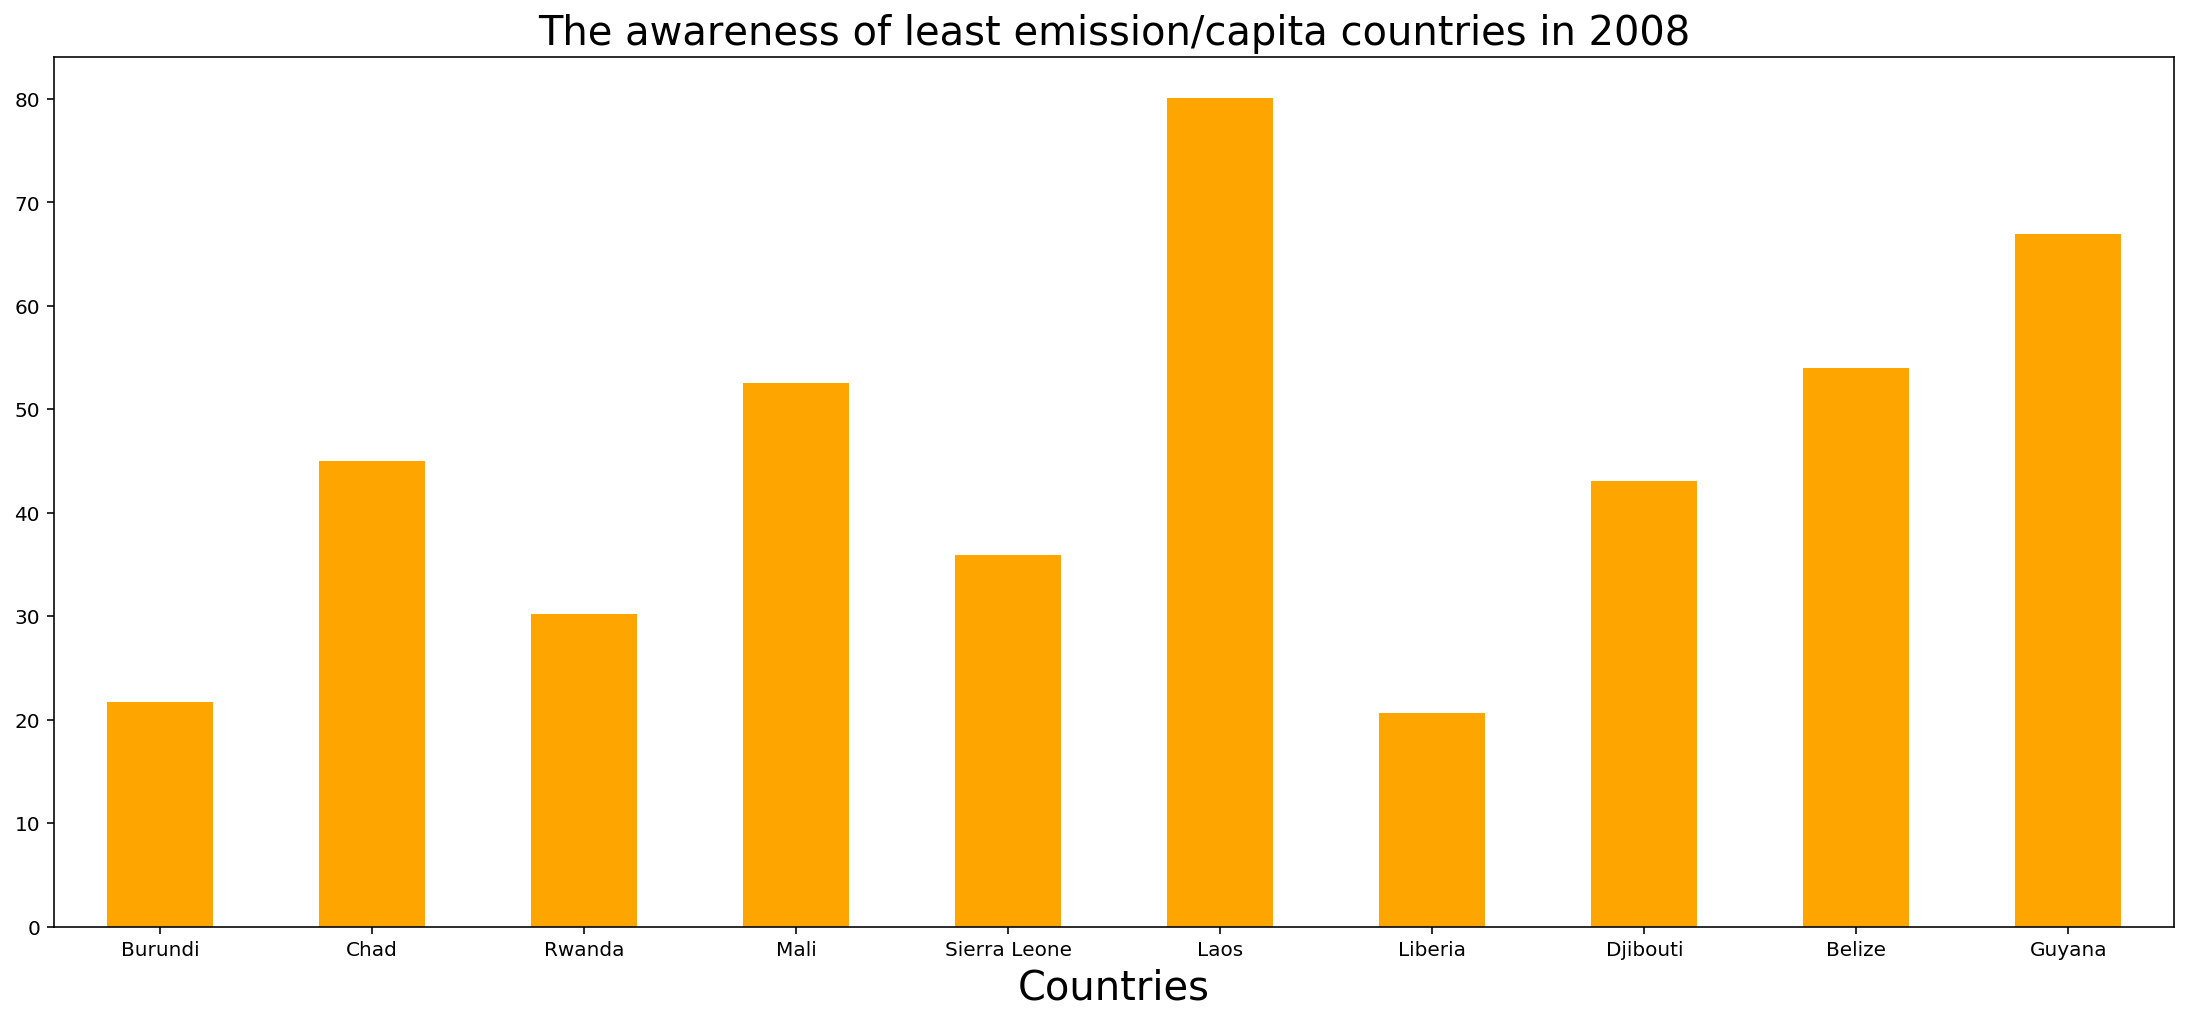

In [60]:
fx = df_least_cemission_awareness.plot.bar(rot=0, figsize = (19,8), color = 'orange')
plt.title('The awareness of least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [61]:
least_emission_awareness = least_emission_awareness.reset_index()
least_emission_awareness

,Entity,Emission/capita,Aware
0,Burundi,0.039451,21.722146
1,Chad,0.090789,45.026337
2,Rwanda,0.095557,30.239067
3,Mali,0.152342,52.543511
4,Sierra Leone,0.207257,35.913370
5,Laos,0.250107,80.076622
6,Liberia,0.269564,20.623373
7,Djibouti,0.950829,43.065372
8,Belize,2.359313,53.990749
9,Guyana,3.218041,66.921008


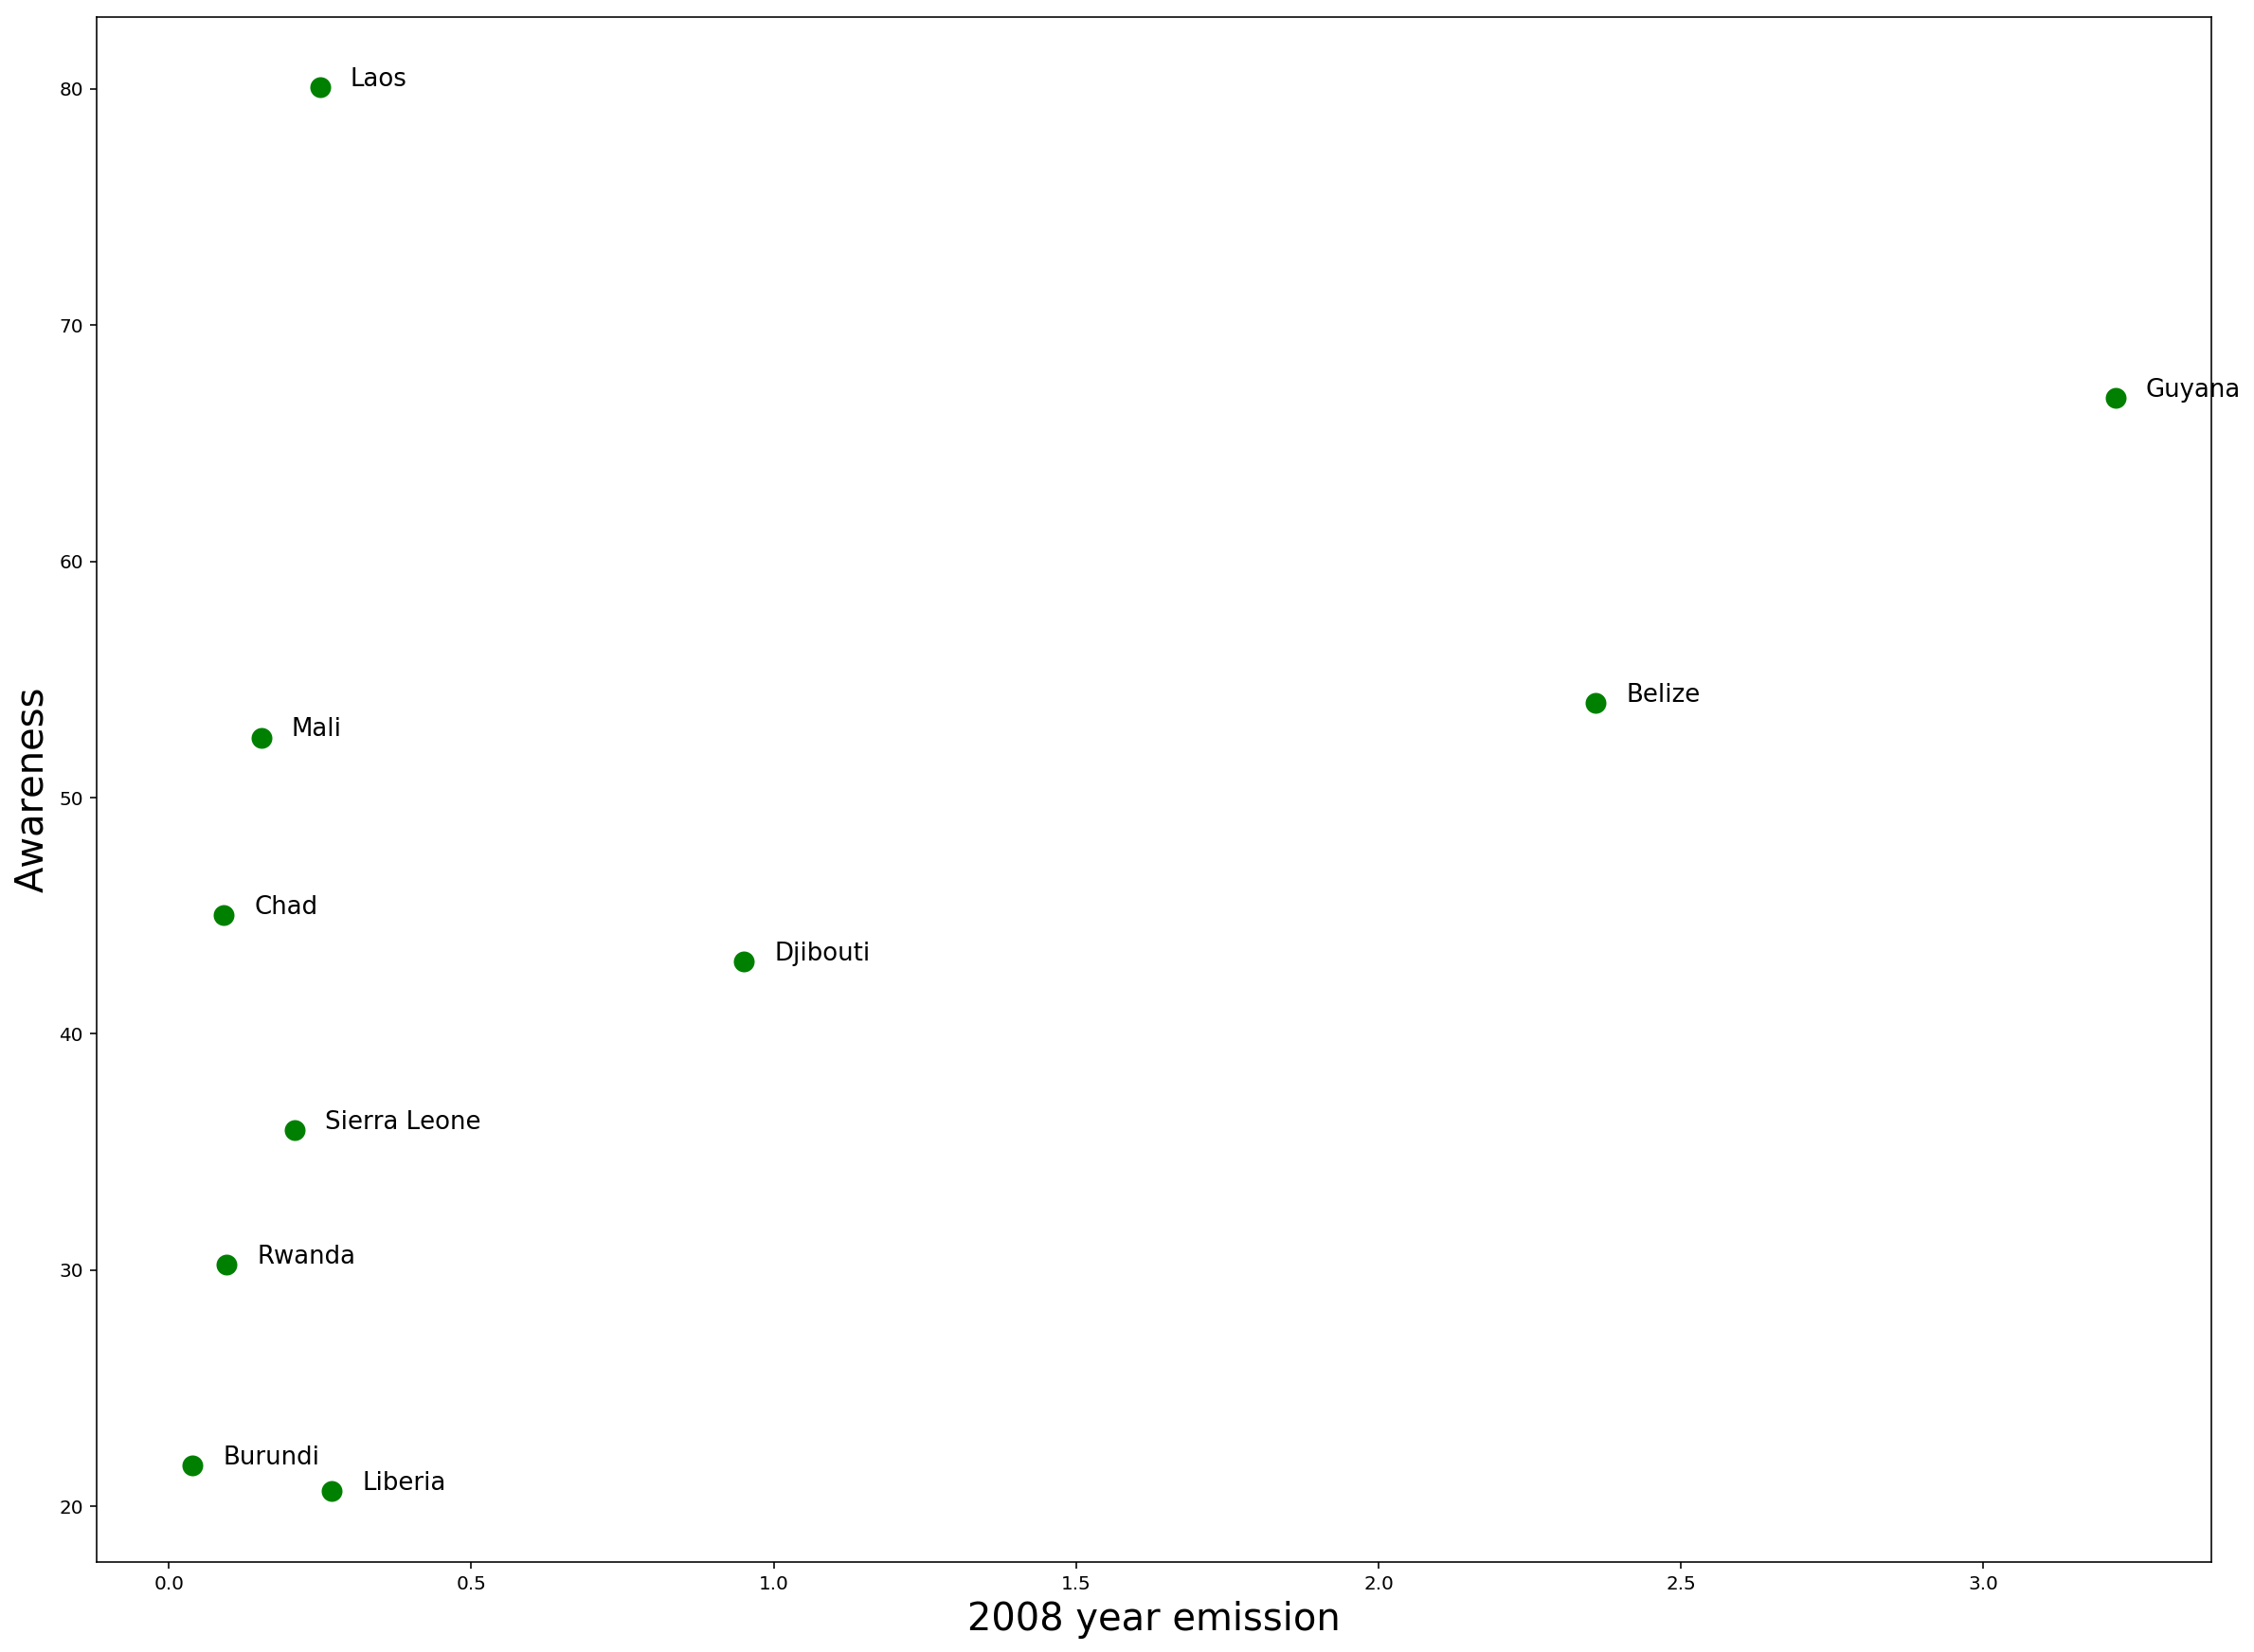

In [74]:
x = least_emission_awareness['Emission/capita']
y = least_emission_awareness['Aware']
types = least_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'green', markersize = 20)
    plt.text(x_coor+0.05, y_coor+0.05, j, fontsize = 13)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)
    
plt.gcf().set_size_inches((20, 15))
plt.show()

surprisingly, when comparing the awareness of the top/least emission country, we find that the citizens in the top 10 emission countries have a higher level of being aware of the climate change than the citizens in the least emission countries. Thus, it doesn't fit in our hypothesis.